
Impoting the libraries

In [10]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import SparseCoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns


# CANCER DATASET

Fold | Score
1    |   0.7631578947368421
2    |   0.7105263157894737
3    |   0.6666666666666666
4    |   0.7280701754385965
5    |   0.6637168141592921


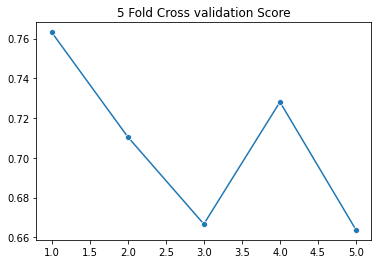

In [11]:
df = pd.read_csv('cancer.csv').drop('id', axis = 1).drop('Unnamed: 32', axis = 1)
df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] = StandardScaler().fit_transform(df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

cf = KFold(n_splits=5)
score = {}
fold = 1

for train_index, test_index in cf.split(df):
  train, test = df.loc[train_index], df.loc[test_index]# train_test_split(df, random_state = 58)
  train = train.set_index('diagnosis')
  test = test.set_index('diagnosis')
  clf = Lasso(alpha=0.22)
  clf.fit(train.T, test.T)
  alpha = clf.coef_
  class_alphas = dict()
  features = set((train.index.values))

  for class_name in train.index.values:
    train_t = train.copy()
    features.remove(class_name)
    train_t.loc[list(features), train_t.columns] = [0 for i in range(train_t.loc[class_name, train_t.columns].shape[1])]
    features.add(class_name)
    class_alphas[class_name] = np.dot(train_t.T, alpha.T)
  Y_pred = []

  for i in range(test.values.shape[0]):
    closest_class = None
    min_dist = math.inf

    for k, v in class_alphas.items():
      d = ((test.values[i] - class_alphas[k].T[i])**2).sum()**0.5 

      if d < min_dist:
        closest_class = k
        min_dist = d

    Y_pred.append(closest_class)

  score_1 = (np.array(Y_pred) == test.index.values).sum() / test.shape[0]
  score[fold] = score_1
  fold += 1

print("Fold | Score")

for k, v in score.items():
  print(k,"   |  ", v)

sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o")
plt.title("5 Fold Cross validation Score")
plt.show()

# IRIS DATASET

Fold | Score
1    |   0.8333333333333334
2    |   0.5666666666666667
3    |   0.0
4    |   0.1
5    |   0.2


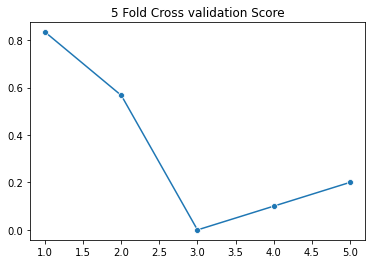

In [17]:
df = pd.read_csv('Iris.csv').drop('Id', axis = 1)
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]] = StandardScaler().fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]])
cf = KFold(n_splits=5)
score = dict()
fold = 1
for train_index, test_index in cf.split(df):
  train, test = df.loc[train_index], df.loc[test_index]# train_test_split(df, random_state = 58)
  train = train.set_index('Species')
  test = test.set_index('Species')
  clf = Lasso(alpha=0.20999999999999996)
  clf.fit(train.T, test.T)
  alpha = clf.coef_

  class_alphas = dict()
  features = set((train.index.values))
  for class_name in train.index.values:
    train_t = train.copy()
    features.remove(class_name)
    train_t.loc[list(features), train_t.columns] = [0 for i in range(train_t.loc[class_name, train_t.columns].shape[1])]
    features.add(class_name)
    class_alphas[class_name] = np.dot(train_t.T, alpha.T)


  Y_pred = []
  for i in range(test.values.shape[0]):
    closest_class = None
    min_dist = math.inf
    for k, v in class_alphas.items():
      d = ((test.values[i] - class_alphas[k].T[i])**2).sum()**0.5 
      if d < min_dist:
        closest_class = k
        min_dist = d
    Y_pred.append(closest_class)
  score_1 = (np.array(Y_pred) == test.index.values).sum() / test.shape[0]
  score[fold] = score_1
  fold += 1

print("Fold | Score")
for k, v in score.items():
  print(k,"   |  ", v)
sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o")

plt.title("5 Fold Cross validation Score")
plt.show()



# SEISMIC-BUMPS DATASET

Fold | Score
1    |   0.7736943907156673
2    |   0.7330754352030948
3    |   0.8143133462282398
4    |   0.851063829787234
5    |   0.7984496124031008


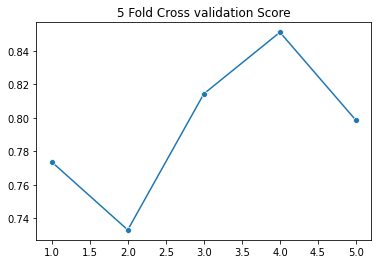

In [13]:
df = pd.read_csv('seismic-bumps.csv').drop('id', axis = 1)

for i in df.columns:
  if df[i].dtype == object:
    df[i] = LabelEncoder().fit_transform(df[i])

df[list(df.columns)[:-1]] = StandardScaler().fit_transform(df[list(df.columns)[:-1]])


cf = KFold(n_splits=5)
score = dict()
fold = 1
for train_index, test_index in cf.split(df):
  train, test = df.loc[train_index], df.loc[test_index]# train_test_split(df, random_state = 58)
  train = train.set_index('class')
  test = test.set_index('class')
  clf = Lasso(alpha=0.199)
  clf.fit(train.T, test.T)
  alpha = clf.coef_
  class_alphas = dict()
  features = set((train.index.values))
  for class_name in train.index.values:
    train_t = train.copy()
    features.remove(class_name)
    train_t.loc[list(features), train_t.columns] = [0 for i in range(train_t.loc[class_name, train_t.columns].shape[1])]
    features.add(class_name)
    class_alphas[class_name] = np.dot(train_t.T, alpha.T)
  Y_pred = []
  for i in range(test.values.shape[0]):
    closest_class = None
    min_dist = math.inf
    for k, v in class_alphas.items():
      d = ((test.values[i] - class_alphas[k].T[i])**2).sum()**0.5 
      if d < min_dist:
        closest_class = k
        min_dist = d
    Y_pred.append(closest_class)
  score_1 = (np.array(Y_pred) == test.index.values).sum() / test.shape[0]
  score[fold] = score_1
  fold += 1

print("Fold | Score")
for k, v in score.items():
  print(k,"   |  ", v)

sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o")
plt.title("5 Fold Cross validation Score")
plt.show()

# YEAST DATASET

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00842541662997226, tolerance: 0.004468022916299265
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018099075359004402, tolerance: 0.009323284998811203
  positive)


Fold | Score
1    |   0.18181818181818182
2    |   0.2828282828282828
3    |   0.2255892255892256
4    |   0.30976430976430974
5    |   0.22635135135135134


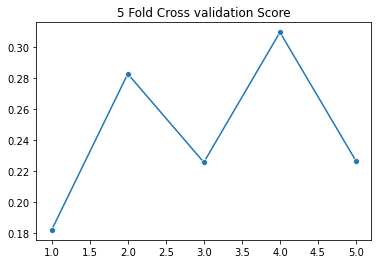

In [14]:
df = pd.read_csv('yeast.csv')

for i in df.columns:
  if df[i].dtype == object:
    df[i] = LabelEncoder().fit_transform(df[i])

df[list(df.columns)[:-1]] = StandardScaler().fit_transform(df[list(df.columns)[:-1]])


cf = KFold(n_splits=5)
score = dict()
fold = 1
for train_index, test_index in cf.split(df):
  train, test = df.loc[train_index], df.loc[test_index]# train_test_split(df, random_state = 58)
  train = train.set_index('class_protein_localization')
  test = test.set_index('class_protein_localization')
  clf = Lasso(alpha=0.199)
  clf.fit(train.T, test.T)
  alpha = clf.coef_
  class_alphas = dict()
  features = set((train.index.values))
  for class_name in train.index.values:
    train_t = train.copy()
    features.remove(class_name)
    train_t.loc[list(features), train_t.columns] = [0 for i in range(train_t.loc[class_name, train_t.columns].shape[1])]
    features.add(class_name)
    class_alphas[class_name] = np.dot(train_t.T, alpha.T)
  Y_pred = []
  for i in range(test.values.shape[0]):
    closest_class = None
    min_dist = math.inf
    for k, v in class_alphas.items():
      d = ((test.values[i] - class_alphas[k].T[i])**2).sum()**0.5 
      if d < min_dist:
        closest_class = k
        min_dist = d
    Y_pred.append(closest_class)
  score_1 = (np.array(Y_pred) == test.index.values).sum() / test.shape[0]
  score[fold] = score_1
  fold += 1

print("Fold | Score")
for k, v in score.items():
  print(k,"   |  ", v)

sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o")
plt.title("5 Fold Cross validation Score")
plt.show()

LEAF DATASET

Fold | Score
1    |   0.014705882352941176
2    |   0.0
3    |   0.029411764705882353
4    |   0.029411764705882353
5    |   0.014705882352941176


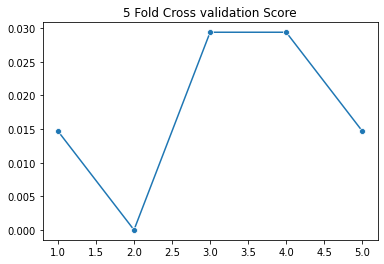

In [15]:
df = pd.read_csv('leaf.csv')

for i in df.columns:
  if df[i].dtype == object:
    df[i] = LabelEncoder().fit_transform(df[i])

df[list(df.columns)[:-1]] = StandardScaler().fit_transform(df[list(df.columns)[:-1]])


cf = KFold(n_splits=5)
score = dict()
fold = 1
for train_index, test_index in cf.split(df):
  train, test = df.loc[train_index], df.loc[test_index]# train_test_split(df, random_state = 58)
  train = train.set_index('Clas')
  test = test.set_index('Clas')
  clf = Lasso(alpha=0.3)
  clf.fit(train.T, test.T)
  alpha = clf.coef_
  class_alphas = dict()
  features = set((train.index.values))
  for class_name in train.index.values:
    train_t = train.copy()
    features.remove(class_name)
    train_t.loc[list(features), train_t.columns] = [0 for i in range(train_t.loc[class_name, train_t.columns].shape[1])]
    features.add(class_name)
    class_alphas[class_name] = np.dot(train_t.T, alpha.T)
  Y_pred = []
  for i in range(test.values.shape[0]):
    closest_class = None
    min_dist = math.inf
    for k, v in class_alphas.items():
      d = ((test.values[i] - class_alphas[k].T[i])**2).sum()**0.5 
      if d < min_dist:
        closest_class = k
        min_dist = d
    Y_pred.append(closest_class)
  score_1 = (np.array(Y_pred) == test.index.values).sum() / test.shape[0]
  score[fold] = score_1
  fold += 1

print("Fold | Score")
for k, v in score.items():
  print(k,"   |  ", v)

sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o")
plt.title("5 Fold Cross validation Score")
plt.show()